![](images/ds_rural.png)

# Módulo 3

## Numpy, Pandas e Gráficos usando Matplotlib

###  Tratamentos de falta de dados 

Com frequência é encontrado datasets com falta de dados, com dados nulos ou com dados incoerentes. Estes datasets devem ser limpados e homogeneizados antes de realizar qualquer operação.

Pandas têm duas formas de tratar dados com valores **null**, **NaN** ou **NA**: Usando uma **máscara** que indica perda de valores ou escolher um valor **sentinela** que indica entrada ausente.

1. **Máscara**: A máscara pode ser uma matriz booleana totalmente separada ou pode envolver a representação de um bit para indicar localmente o status nulo de um valor.

2. **Sentinela**: o valor do sentinela pode ser uma convenção específica de dados, como por exemplo, para indicar um valor inteiro com **-999** ou otro valor determinado por convenção. O valor **NaN** é uma convenção da IEEE para determinar um valor de ponto flutuante ausente. 

- **None**: É o primeiro valor sentinela usado por Pandas, tratado como um objeto do Python.

In [2]:
# exemplo
import numpy as np
import pandas as pd
#
notas_none = np.array([4.0,7.0, 6.5, None, 10, 8.8, None, 9.0])
print('A:',notas_none)

A: [4.0 7.0 6.5 None 10 8.8 None 9.0]


In [ ]:
# operacoes!!!
notas_none.sum()

- **NaN**: Dados numéricos ausentes. (*Not a Number*). Valor de ponto flutuante especial reconhezidos pelos sistemas que usam a representação padrão de ponto flutuante da IEEE.

In [ ]:
notas_nan = np.array([4.0,7.0, 6.5, np.nan, 10, 8.8, np.nan, 9.0])
print('Notas:',notas_nan)
print('Tipo:',notas_nan.dtype)


In [ ]:
# Operacoes aritmeticas: soma
v = 1 + np.nan
v

In [ ]:
# Operacoes aritmeticas: multiplicacao
v1 = 0*np.nan
v1

In [ ]:
# agregados
notas_nan.sum(), notas_nan.min(), notas_nan.max()

- **NaN** e **None** em Pandas

In [ ]:
# serie de pandas
serie = pd.Series([2,3.0, np.nan, 8, 5.0, None,-1.0])
serie

In [ ]:
# serie de pandas
x_int = pd.Series(range(6), dtype=int)
x_int

In [ ]:
x_int[0] = None
x_int[3]  = None
x_int

### Operações com Valores Nulos

- **isnull()**: Gera uma mácara booleana indicandoi valores ausentes.
- **notnull()**: Retorna os valores não nulos
- **dropna()**: Retorna a serie ou dataframe sem valores nulos.
- **fullna()**: Retorna uma copia dos dados com valores ausentes preenchidos.

In [ ]:
# exemplos detectando valores nulos
serie_nulos = pd.Series([-1.0, 1, 4.5, np.nan, 'oi',None, 10])
print('Serie:',serie_nulos)

In [ ]:
# valores não nulos
serie_nulos[serie_nulos.notnull()]

In [ ]:
# Eliminando valores nulos
n_nulos = serie_nulos.dropna()
n_nulos

In [ ]:
# DataFrame
df = pd.DataFrame([[1, np.nan, 2,5],[2, 3, 5, -1.0],[np.nan, 4, 6, 20]])
df

In [ ]:
# dropna em dataframe
df1 = df.dropna()
df1

In [ ]:
# Elimina colunas
df2 = df.dropna(axis='columns')
df2

In [ ]:
# elimina colunas
df3 = df2 = df.dropna(axis='rows')
df3

In [ ]:
# elimina todas as colunas com valores nulos
print(df)
df3 = df.dropna(axis=1)
print(df3)

In [ ]:
# preenchendo valores nulos
dados = pd.Series([1, np.nan, 2, None, 3.0, 6.0, 7], index=list('abcdedg'))
dados

In [ ]:
# preenchendo com zero
d = dados.fillna(0)
d

## Gráficos - Matplolib

In [3]:
# importando a biblioteca
import matplotlib.pyplot as plt
# estilos clasico do matplotlib
plt.style.use('classic')

In [ ]:
# exemplo - grafico
x = np.linspace(0,10,100)
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))
plt.show()

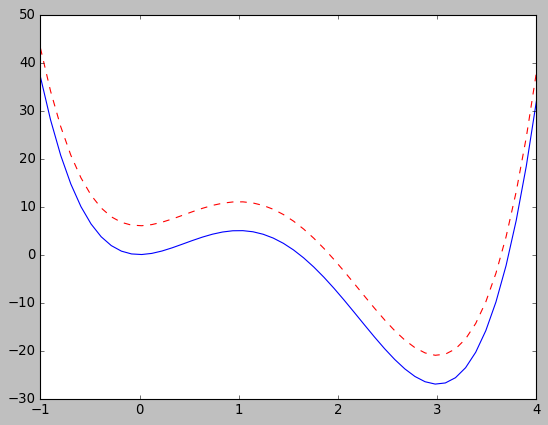

In [3]:
# ipython notebook
x1 = np.linspace(-1,4,50)
y1 = 3*(np.power(x1,4)) - 16*(np.power(x1,3))+18*(np.power(x1,2))
# para gravar a figura
fig = plt.figure()
plt.plot(x1,y1,'-')
plt.plot(x1,y1+6,'r--'); # ;->show()
#fig.savefig('images/figura1.png')

In [ ]:
# verificando se a imagem foi gerada
from IPython.display import Image
Image('images/figura1.png')

In [ ]:
# tipos de formatos de graficos suportados
fig.canvas.get_supported_filetypes()

### Usando Varias Interfaces - Subplots

In [ ]:
# exemplo de subplots
plt.figure() # criar a figura
# criando a painel 1
plt.subplot(2, 1, 1) # (linha, coluna, numero do panel)
plt.plot(x1, y1,'--r')
# criando o painel 2
plt.subplot(2, 1, 2)
plt.plot(x1, y1+6);
# criando o painel 3
#plt.subplot(3, 1, 3)
#plt.plot(x1, y1-6,'-.g');

- **Interfaces Orientadas a Objetos**

In [ ]:
# intercaes orientadas como objetos
# grid de subplots
fig, ax = plt.subplots(2)
ax[0].plot(x1, y1,'r')
ax[1].plot(x1, y1-6);

In [ ]:
# subplot vertical
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Subplot Vertical')
ax1.plot(x1, y1,'--r')
ax2.plot(x1, y1-6);
#fig.savefig('images/fx.png')

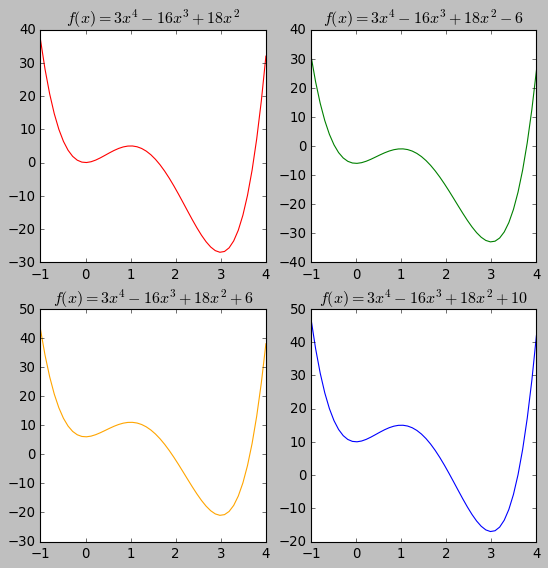

In [4]:
# grid de subplots
fig,ax =  plt.subplots(2,2,figsize=(8,8))
#fig,ax =  plt.subplots(2,2,figsize=(8,8),constrained_layout=True)
ax[0][0].plot(x1,y1,'r')
ax[0][0].set_title('$f(x)=3x^4-16x^3+18x^2$')
#ax[0][0].set_ylabel('y')
#ax[0][0].set_xlabel('x')
#
ax[0][1].plot(x1,y1-6,'g')
ax[0][1].set_title('$f(x)=3x^4-16x^3+18x^2-6$')
#
ax[1][0].plot(x1,y1+6,'orange')
ax[1][0].set_title('$f(x)=3x^4-16x^3+18x^2+6$')
#
ax[1][1].plot(x1,y1+10,'blue')
ax[1][1].set_title('$f(x)=3x^4-16x^3+18x^2+10$')
#
#plt.suptitle('$f(x)=3x^4-16x^3+18x^2$', verticalalignment='bottom', fontsize=14)
plt.show()
#fig.savefig('images/subpots.png')

- **Graficar linhas simples**

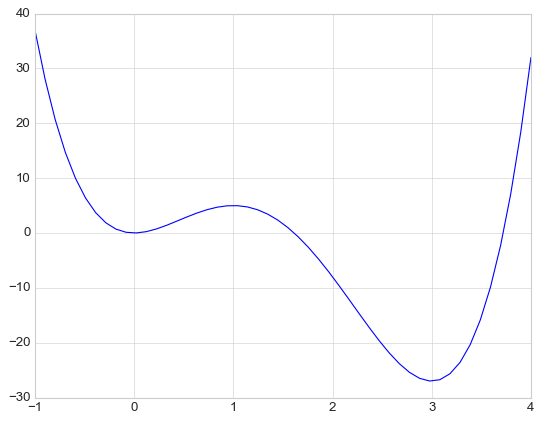

In [5]:
# grid de linhas
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
plt.plot(x1,y1,'-');

#### Cores e Estilos de Linhas

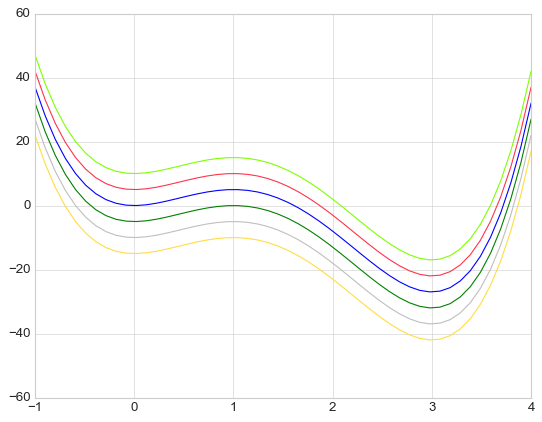

In [16]:
# graficos de diversas cores
plt.plot(x1, y1, color='blue') # specify color by name
plt.plot(x1, y1-5, color='g') # short color code (rgbcmyk)
plt.plot(x1, y1-10, color='0.75') # Grayscale between 0 and 1
plt.plot(x1, y1-15, color='#FFDD44') # Hex code (RRGGBB from 00 to FF)
plt.plot(x1, y1+5, color=(1.0,0.2,0.3)) # RGB tuple, values 0 and 1
plt.plot(x1, y1+10, color='chartreuse');

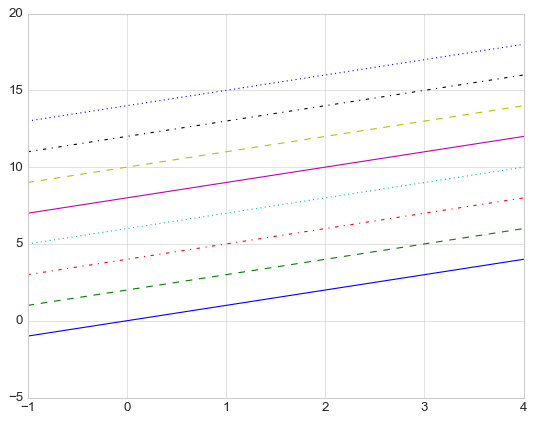

In [14]:
# Graficos e estilos de linhas
plt.plot(x1, x1 + 0, linestyle='solid')
plt.plot(x1, x1 + 2, linestyle='dashed')
plt.plot(x1, x1 + 4, linestyle='dashdot')
plt.plot(x1, x1 + 6, linestyle='dotted');
# usando codigos
plt.plot(x1, x1 + 8, linestyle='-') # solid
plt.plot(x1, x1 + 10, linestyle='--') # dashed
plt.plot(x1, x1 + 12, linestyle='-.') # dashdot
plt.plot(x1, x1 + 14, linestyle=':'); # dotted

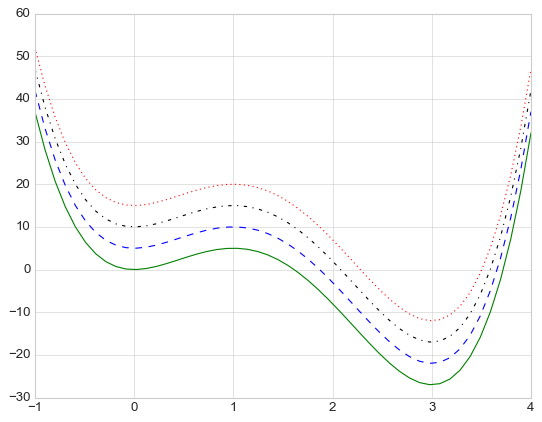

In [18]:
# combiandno cores e estilos de linha
plt.plot(x1, y1 + 0, '-g')
plt.plot(x1, y1 + 5, '--b')
plt.plot(x1, y1 + 10, '-.k')
plt.plot(x1, y1 + 15, ':r');

#### Ajustando os limites do eixos

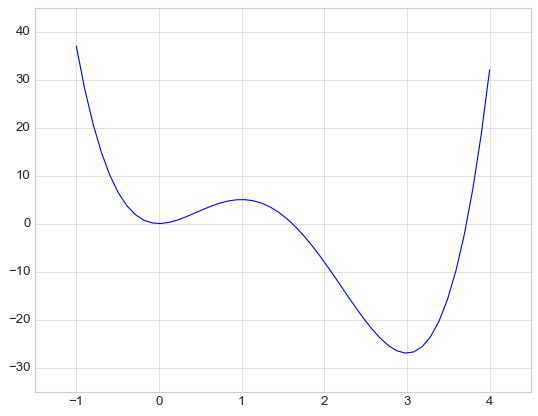

In [30]:
# Ajustando limites de eixos
plt.plot(x1, y1)
plt.xlim(-1.5, 4.5)
plt.ylim(-35, 45);

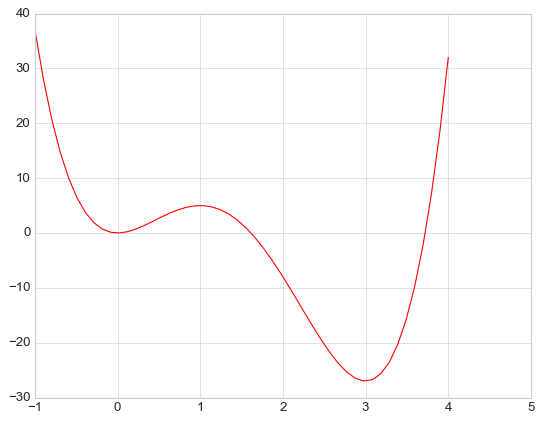

In [31]:
# Ajustando eixos
plt.plot(x1, y1,'r')
# [xmin,xmax, ymin,ymax]
plt.axis([-1, 5, -30, 40]);

### Gráficos Usando os datasets do COVID19

In [4]:
# graficando covid
confirmados =  pd.read_csv('data/covid19_confirmed.csv',delimiter=',')
mortos = pd.read_csv('data/covid19_deaths.csv',delimiter=',')
salvos = pd.read_csv('data/covid19_recovered.csv',delimiter=',')
#
print('confirmados',confirmados.head())
print('Mortos',mortos.head())
print('Salvos',salvos.head())

confirmados   Province/State  Country/Region      Lat      Long  1/22/20  1/23/20  \
0          Anhui  Mainland China  31.8257  117.2264        1        9   
1        Beijing  Mainland China  40.1824  116.4142       14       22   
2      Chongqing  Mainland China  30.0572  107.8740        6        9   
3         Fujian  Mainland China  26.0789  117.9874        1        5   
4          Gansu  Mainland China  36.0611  103.8343        0        2   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  3/2/20  3/3/20  3/4/20  3/5/20  \
0       15       39       60       70  ...     990     990     990     990   
1       36       41       68       80  ...     414     414     418     418   
2       27       57       75      110  ...     576     576     576     576   
3       10       18       35       59  ...     296     296     296     296   
4        2        4        7       14  ...      91      91      91     102   

   3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  
0     990     990     990 

In [38]:
x = confirmados['Province/State']
y1 = confirmados['3/10/20']
y2 = mortos['3/10/20']
y3 = salvos['3/10/20']

In [41]:
#X1 = pd.DataFrame(x)
x.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
399    False
400     True
401     True
402     True
403    False
Name: Province/State, Length: 404, dtype: bool

In [5]:
# tratamento de valores
x1 = confirmados.dropna()
x1.isnull()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
399,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
#x = confirmados['Province/State']
#y1 = confirmados['3/10/20']
x1.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,102,119,120,124,124,125,0.0
9,Hebei,Mainland China,38.0428,114.5149,1,1,2,8,13,18,...,318,318,318,318,318,318,318,318,318,0.0
39,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,8,9,12,13,21,21,27,32,32,39.0
41,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,6,13,22,22,26,28,38,48,55,65.0
42,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,9,9,10,10,10,11,11,15,18,21.0


In [6]:
x1.head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,102,119,120,124,124,125,0.0
9,Hebei,Mainland China,38.0428,114.5149,1,1,2,8,13,18,...,318,318,318,318,318,318,318,318,318,0.0
39,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,8,9,12,13,21,21,27,32,32,39.0
41,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,6,13,22,22,26,28,38,48,55,65.0
42,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,9,9,10,10,10,11,11,15,18,21.0
43,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,9,11,11,13,13,13,15,15,18,20.0
55,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,3,3,5,5,7,7,7,7,7,9.0
61,From Diamond Princess,Australia,35.4437,139.6380,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
92,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,2,2,2,3,3,3,3,4,6,9.0
106,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,3.0


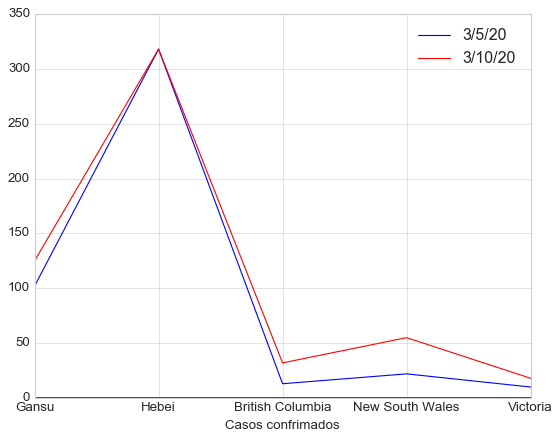

In [53]:
xx = x1['Province/State']
y1 = x1['3/5/20']
y2 = x1['3/10/20']
plt.plot(xx,y1,'b',label='3/5/20');
plt.plot(xx,y2,'r',label='3/10/20')
plt.xlim('Gansu', 'Victoria')
plt.legend()
#plt.grid()
plt.xlabel('Casos confrimados');

**Exercícios**
Usando os datasets de casos confirmados, mortos e recuperados:
1. Fazer o tratamento de dados inconsistentes
2. Apresente o gráficos de 'province/State' x '3/5/20' dos datasets cpara onfirmados.
3. Apresente os gráficos de 'province/State' x '3/5/20' do dataset mortos.
4. Apresente os gráficos de 'province/State' x '3/5/20' do dataset recuperados.
5. Apresente o gráficos usando dos três datasets.
6. Apresente os gráficos para os três datasets para o intervalo de Province/State['Gansu','Grand Princess']. Usar diversas cores e tipos de linhas para apresentar os resultados.


---
Python pada Dada Science - Profs. [Jorge Zavaleta](zavaleta@pet-si.ufrrj.br) - Sergio Serra - Macário Costa.